**Online Retail Dataset:**

- Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.

- The size of this dataset is about 541909 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID).

In [1]:
## Importing all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset

df = pd.read_csv('retail_data.csv', encoding='latin')

In [3]:
df.head() #1st 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


**Attribute Information:**

- **InvoiceNo:** Invoice number A 6-digit integral number uniquely assigned to each customers,If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product (item) code, a 5-digit integral number uniquely assigned to each  distinct product.
- **Description:** product item descriptions(Nominal).
- **Quantity:** The quantities of each product (item) per transaction.
- **InvoiceDate:** Invice date and time. The day and time when a transaction was generated.
- **UnitPrice:** Unit price. Product price per unit.
- **CustomerID:** Customer number. A 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. The name of the country where a customer resides.

In [4]:
df.shape ## dataset rows and columns

(541909, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.dtypes ## datatypes of all columns

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.info() #gives all info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
## Checking missing values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [9]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)  ## % of missing values

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

- For purposes of customer segmentation missing ids will be dropped.

In [10]:
print("Number of unique customers IDs:", len(df['CustomerID'].unique()))

Number of unique customers IDs: 4373


In [11]:
df = df.dropna()

In [12]:
df.shape

(406829, 8)

- Now we have 406829 rows and 8 columns in our dataset.

In [13]:
df['Description'] = df['Description'].str.lower()

In [14]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [15]:
## Converting customer_id(float type) to integer type
df['CustomerID'] = df['CustomerID'].astype('int64') 

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


- As we can see,some quantity is negative. This has to be seen later as these values should ideally be positive in nature.
- Let's have a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some anceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

In [17]:
## Filtering transaction with invoice number started with letter 'C'
cancelled_trans = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,12-01-2010 09:41,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,12-01-2010 09:49,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,12-01-2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,12-01-2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,12-01-2010 10:24,0.29,17548,United Kingdom


In [18]:
cancelled_trans['InvoiceNo'].count()

8905

- We can see there are 8905 InvoiceNo with the Cancelled transaction.
- Among cancelled transactions ther are no transaction with positive quantity

In [19]:
cancelled_trans[cancelled_trans['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


- Hovewer some transactions with negative quantity,which may not be belong to cancelled transaction.

In [20]:
print("Number of cancelled transactions:", len(cancelled_trans))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 8905
Total number of transaction with negative quantity: 8905


- No negative quantity in dataset.
- Assuming that quantity should not be negative we will just drop the InvoiceID with cancelled transaction.

In [21]:
con = df['Quantity']>0

In [22]:
 df = df[con]

In [23]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [24]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12-01-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12-01-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12-01-2010 08:26,2.75,17850,United Kingdom


In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

- In Pandas, the day format starts from 0 to 6, i.e. Monday=0, Tuesday=1,.....Sunday=6, so apply +1 to make Monday=1...untill Sunday=7

In [27]:
df["Year"] = (df["InvoiceDate"]).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = ((df["InvoiceDate"]).dt.dayofweek) + 1
df["Hour"] = df["InvoiceDate"].dt.strftime('%H')
#df['Month_Year'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
#:%M'
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08


In [28]:
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08,Wednesday
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08,Wednesday
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08,Wednesday


In [29]:
df["IsWeekend"] = (df["Day"] >= 5).astype(int)
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08,Wednesday,0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08,Wednesday,0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08,Wednesday,0


In [30]:
df['Year'].unique()

array([2010, 2011], dtype=int64)

In [31]:
df['Day'].unique()

array([3, 4, 5, 7, 1, 2], dtype=int64)

In [32]:
df['Day_Name'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

**Total_Amount, which the  Customer spend on Purchase**

In [33]:
df['Amount_Spent'] = df['Quantity']* df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend,Amount_Spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08,Wednesday,0,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08,Wednesday,0,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08,Wednesday,0,22.00


In [34]:
df.shape

(397924, 15)

### Data Visulaization(EDA)

#### Top 10 cutomers with Country and Invoice Number

In [35]:
cust_invoice_country = df.groupby(['CustomerID','Country'])['InvoiceNo'].count().sort_values(ascending=False)[:10].reset_index()
cust_invoice_country

,CustomerID,Country,InvoiceNo
0,17841,United Kingdom,7847
1,14911,EIRE,5677
2,14096,United Kingdom,5111
3,12748,United Kingdom,4596
4,14606,United Kingdom,2700
5,15311,United Kingdom,2379
6,14646,Netherlands,2080
7,13089,United Kingdom,1818
8,13263,United Kingdom,1677
9,14298,United Kingdom,1637


In [36]:
customer_invoice = df.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False)[:10]

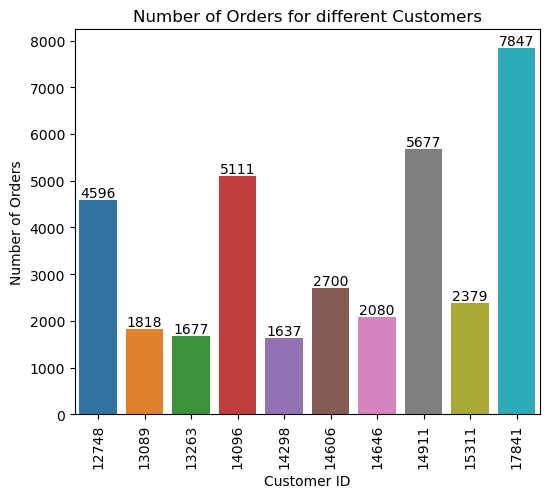

In [37]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=customer_invoice.index, y=customer_invoice.values)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label)

plt.show() 

In [38]:
country_invoice = df.groupby(['Country'])['InvoiceNo'].count().sort_values(ascending=False)[:10]
country_invoice

Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: InvoiceNo, dtype: int64

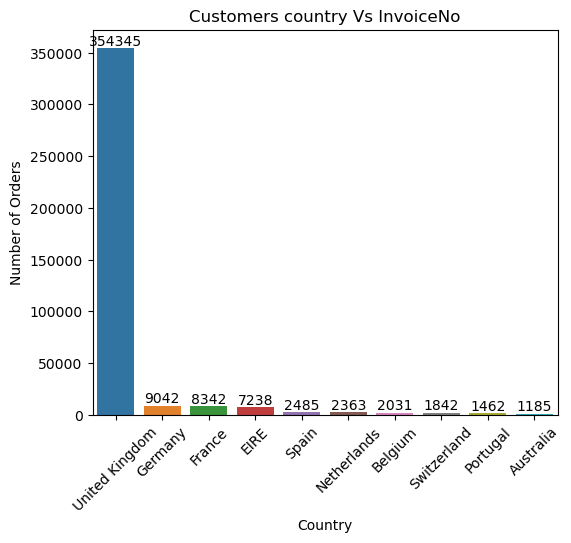

In [39]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=country_invoice.index, y=country_invoice.values)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Customers country Vs InvoiceNo')
plt.xticks(rotation=45)
for label in ax.containers:
    ax.bar_label(label)

plt.show() 

- We can see that, most of the orders are from UnitedKingdom.

* **Total_Amount spent by top 10 Customers based on invoiceNo and Country.**

In [40]:
money_spent_10 = df.groupby(by=['CustomerID','Country','InvoiceNo'])['Amount_Spent'].sum().sort_values(ascending=False).reset_index()[:10]
money_spent_10

,CustomerID,Country,InvoiceNo,Amount_Spent
0,16446,United Kingdom,581483,168469.60
1,12346,United Kingdom,541431,77183.60
2,15098,United Kingdom,556444,38970.00
3,17450,United Kingdom,567423,31698.16
4,12415,Australia,556917,22775.93
5,18102,United Kingdom,572209,22206.00
6,17450,United Kingdom,567381,22104.80
7,12415,Australia,563614,21880.44
8,15749,United Kingdom,550461,21535.90
9,14646,Netherlands,572035,20277.92


In [41]:
money_spent = df.groupby(by=['CustomerID'])['Amount_Spent'].sum().reset_index()
money_spent

,CustomerID,Amount_Spent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


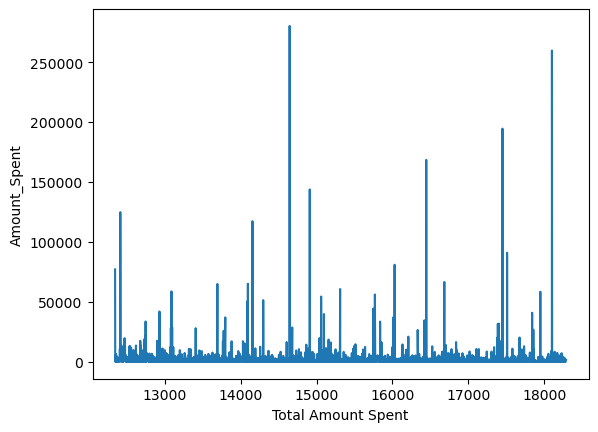

In [42]:
sns.lineplot(money_spent['CustomerID'],money_spent['Amount_Spent'], data=money_spent )
plt.xlabel('CustomerID')
plt.xlabel('Total Amount Spent')
plt.show()

**How many orders per month?**

In [43]:
monthly_sale = df.groupby(['Month'])['InvoiceNo'].count().reindex([1,2,3,4,5,6,7,8,9,10,11,12]).reset_index()
monthly_sale

,Month,InvoiceNo
0,1,21232
1,2,19928
2,3,27177
3,4,22644
4,5,28322
5,6,27185
6,7,26827
7,8,27013
8,9,40030
9,10,49557


In [44]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

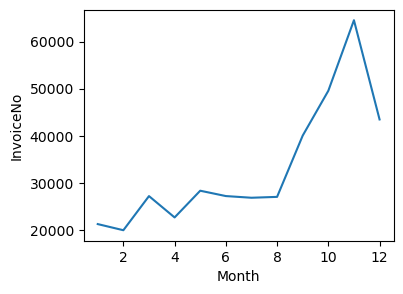

In [45]:
plt.figure(figsize=(4,3))
ax = sns.lineplot(x="Month", y="InvoiceNo", data = monthly_sale )
plt.show()

- There are more purchasing made at the end of the year. The highest number of transactions were made during November. Probably reason could be the fact, that people tend to prepare for Christmas during November. Other than the month of November, number of purchases during the year is quite similar.

**How many orders per Day?**

In [46]:
daily_sale = df.groupby(['Day_Name'])['InvoiceNo'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
daily_sale

,Day_Name,InvoiceNo
0,Monday,64899
1,Tuesday,66476
2,Wednesday,68888
3,Thursday,80052
4,Friday,54834
5,Sunday,62775


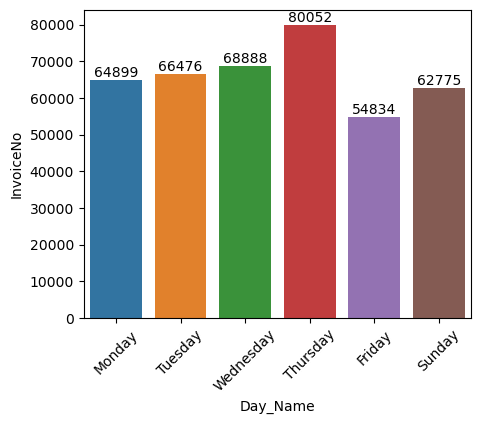

In [47]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x="Day_Name", y="InvoiceNo", data =daily_sale )
plt.xticks(rotation=45)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- We can see that, on ThrusDay there is somewhat more sale as compare to other Days
- Interesting fact is that there were not any transaction on Saturday during the whole period. One of the explanations colud be some filter during the data collection process. Number of buyings are not significantly differ according to the day of the week.

In [48]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend,Amount_Spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08,Wednesday,0,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08,Wednesday,0,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08,Wednesday,0,22.00


**How many orders per hour?**

In [49]:
hourly_sale = df.groupby(['Hour'])['InvoiceNo'].count().reset_index()
hourly_sale

,Hour,InvoiceNo
0,06,1
1,07,379
2,08,8691
3,09,21945
4,10,37999
5,11,49092
6,12,72069
7,13,64031
8,14,54127
9,15,45372


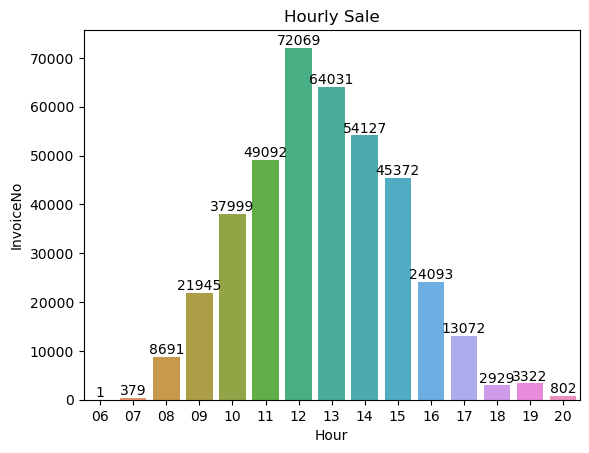

In [50]:
ax = sns.barplot(x="Hour", y="InvoiceNo", data =hourly_sale )
plt.title('Hourly Sale')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- The most number of transactions is done between 12 a.m. and 2 p.m., There aren't any transactions after 8 p.m. till 6 a.m.

In [51]:
df['UnitPrice'].describe().round(2)

count    397924.00
mean          3.12
std          22.10
min           0.00
25%           1.25
50%           1.95
75%           3.75
max        8142.75
Name: UnitPrice, dtype: float64

- From the descriptive statistics for UnitPrice variable, we could see that most ot the sold products are quite cheap.

- Now lets see the Description of products, which unit price is more than 50 (Assumption: same currency for retails in different countries.)

In [52]:
df[df['UnitPrice']>50]['Description'].unique()

array(['rustic  seventeen drawer sideboard',
       'vintage post office cabinet', 'vintage red kitchen cabinet',
       'regency mirror with shutters', 'love seat antique white metal',
       'vintage blue kitchen cabinet', 'school desk and chair ',
       'chest natural wood 20 drawers', 'carriage',
       'decorative hanging shelving unit', 'manual', 'postage',
       'picnic basket wicker 60 pieces', 'dotcom postage'], dtype=object)

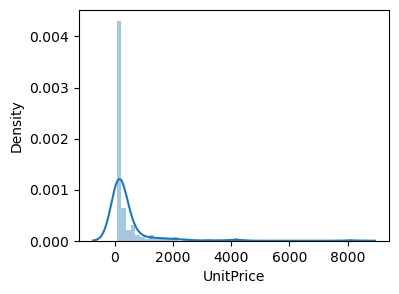

In [53]:
plt.figure(figsize=(4,3))
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=True)
plt.show()

In [54]:
print("Transactions were made in", len(df['Country'].unique()), "different countries")

Transactions were made in 37 different countries


In [55]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [56]:
df[df['Country']=='Unspecified'].count()[6]

244

In [57]:
print("Number of transactions where country is unspecified:", len(df[df['Country']=='Unspecified']))

Number of transactions where country is unspecified: 244


In [58]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend,Amount_Spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,3,08,Wednesday,0,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,3,08,Wednesday,0,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,3,08,Wednesday,0,22.00


- Adding new attributes.
- RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- **Recency(R)**: Days since last purchase
- **Frequency(F)**: Total number of purchases
- **Monetory value(M)**: Total money, customer spent.

In [59]:
## Calculating Monetary(Amount_Spent)
rfm_m = df.groupby('CustomerID')['Amount_Spent'].sum().reset_index().rename(columns={'Amount_Spent':'Amount'})
rfm_m.head()

,CustomerID,Amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [60]:
## Calculating Frequency.
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns= {'InvoiceNo':'Frequency'})
rfm_f.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [61]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [62]:
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])

# Compute the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']

# Compute last transaction date to get the recency of customers
rfm_p = df.groupby('CustomerID')['Diff'].min().reset_index()

## Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days 

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')

In [63]:
rfm = rfm.rename(columns={'Diff':'Recency'})
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


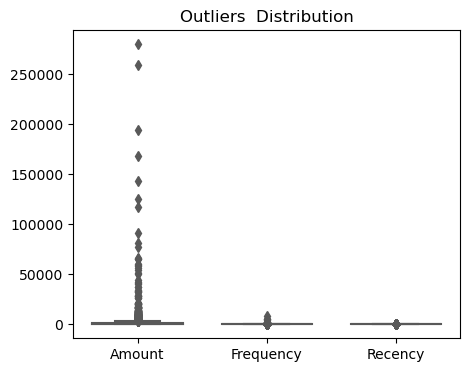

In [64]:
# Outlier Analysis of Amount, Frequency and Recency

features = ['Amount','Frequency','Recency']
plt.figure(figsize=(5,4))
sns.boxplot(data = rfm[features], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers  Distribution")
plt.show()

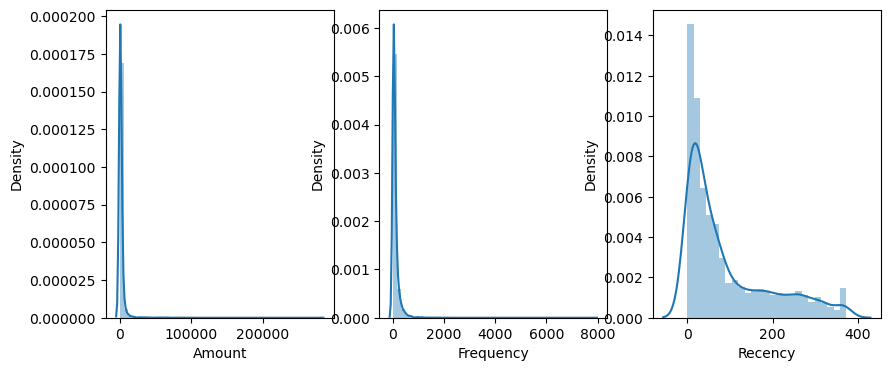

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.distplot( rfm['Amount'], kde=True)

plt.subplot(1,3,2)
sns.distplot( rfm['Frequency'], kde=True)

plt.subplot(1,3,3)
sns.distplot( rfm['Recency'], kde=True)
plt.show()

In [66]:
print(rfm['Amount'].skew() )
print(rfm['Frequency'].skew())
print(rfm['Recency'].skew())

19.326985305561823
18.106242903118684
1.2463568823921845


- We can see that, attribute Amopunt and Frequency are right skewd and the large nu of outliers are present.

In [67]:
rfm['Amount'] = np.log(rfm['Amount'] + 0.01)
rfm['Frequency'] = np.log(rfm['Frequency'] + 0.01)
rfm['Recency'] = np.log(rfm['Recency'] + 0.01)

In [68]:
print(rfm['Amount'].skew() )
print(rfm['Frequency'].skew())
print(rfm['Recency'].skew())

0.21982103052670493
-0.21726111425599065
-1.927448596683192


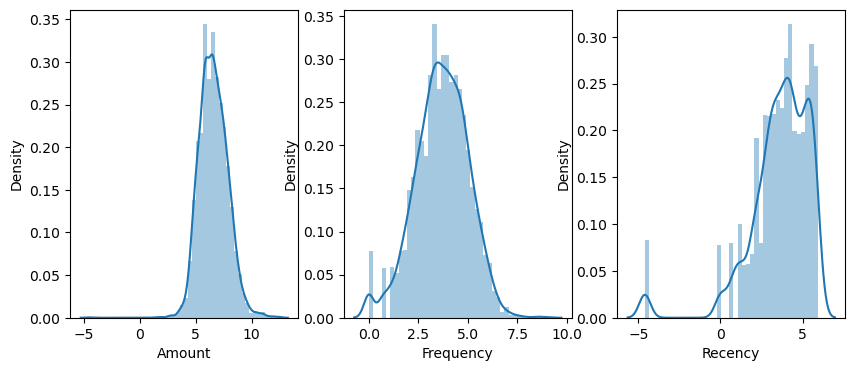

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.distplot( rfm['Amount'], kde=True)

plt.subplot(1,3,2)
sns.distplot( rfm['Frequency'], kde=True)

plt.subplot(1,3,3)
sns.distplot( rfm['Recency'], kde=True)
plt.show()

In [70]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,11.253942,0.009950,5.783856
1,12347,8.368696,5.204062,0.009950
2,12348,7.494013,3.434310,4.304200
3,12349,7.471682,4.290596,2.890927
4,12350,5.812368,2.833801,5.733374


In [71]:
X = rfm.iloc[:, 1:]

In [72]:
X.head()

,Amount,Frequency,Recency
0,11.253942,0.009950,5.783856
1,8.368696,5.204062,0.009950
2,7.494013,3.434310,4.304200
3,7.471682,4.290596,2.890927
4,5.812368,2.833801,5.733374


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [74]:
X

array([[ 3.6680841 , -2.7679573 ,  1.16931864],
       [ 1.39976378,  1.14971334, -1.93470149],
       [ 0.71210682, -0.18512618,  0.3738638 ],
       ...,
       [-1.10545429, -0.90058741, -0.89317262],
       [ 0.8325835 ,  2.22376338, -1.34765376],
       [ 0.72942944,  0.42908289,  0.06942802]])

### Modelling(K-Means Clutering)

**Elbow Curve**
- Find the optimal number of cluster

In [75]:
from sklearn.cluster import KMeans

In [76]:
wcss = []
for k in range(1,7):
    k_model = KMeans(n_clusters = k, init = 'k-means++',random_state=0)
    k_model.fit(X)
    wcss.append(k_model.inertia_)
print(wcss)

[13017.000000000004, 7199.288582255607, 5540.639135473083, 4425.249237043867, 3823.2873091873807, 3294.900529763177]


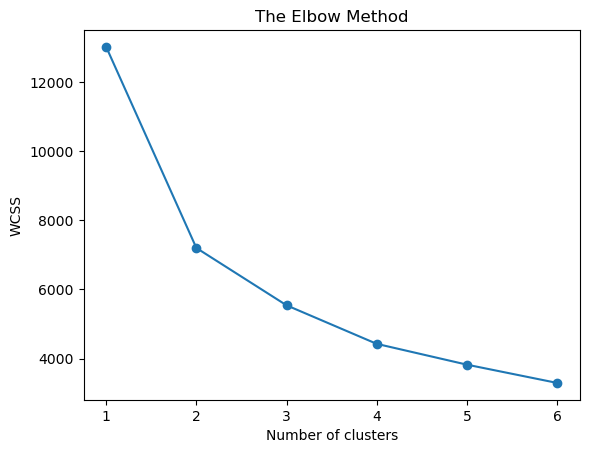

In [77]:
plt.plot(range(1,7),wcss, '-o')
plt.xticks(range(1,7))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Optimal number of cluster is 3.**

### K-Means Model

In [78]:
#Modelling
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)

In [79]:
#Predict
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 2 0 ... 1 2 0]


In [80]:
rfm['cluster'] = pd.DataFrame(y_kmeans)
rfm.head()

,CustomerID,Amount,Frequency,Recency,cluster
0,12346,11.253942,0.009950,5.783856,0
1,12347,8.368696,5.204062,0.009950,2
2,12348,7.494013,3.434310,4.304200,0
3,12349,7.471682,4.290596,2.890927,0
4,12350,5.812368,2.833801,5.733374,1


In [81]:
rfm[rfm['cluster']==1]

,CustomerID,Amount,Frequency,Recency,cluster
4,12350,5.812368,2.833801,5.733374,1
6,12353,4.488749,1.388791,5.313255,1
8,12355,6.129943,2.565718,5.361339,1
14,12361,5.246550,2.303585,5.656027,1
16,12363,6.313566,3.135929,4.691440,1
...,...,...,...,...,...
4332,18277,4.704020,2.080691,4.043227,1
4333,18278,5.158538,2.198335,4.290596,1
4334,18280,5.196340,2.303585,5.624054,1
4335,18281,4.392348,1.947338,5.193012,1


In [82]:
rfm[['cluster']].value_counts(normalize=True)

cluster
0          0.449643
1          0.388108
2          0.162249
dtype: float64

### Visulising the Clusters
**Before Clustering**

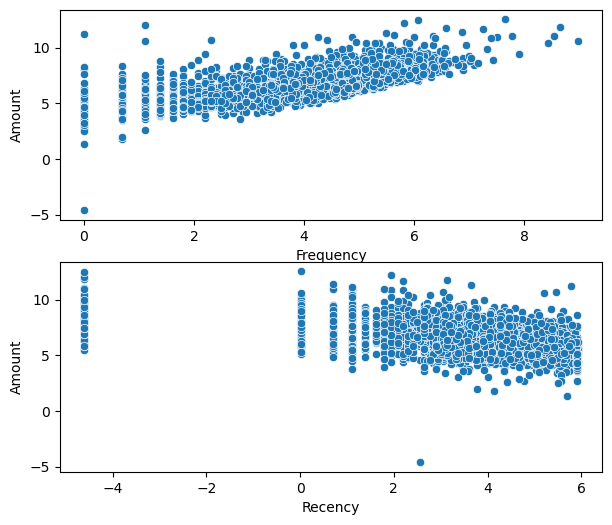

In [83]:
plt.figure(figsize=(7,6))

plt.subplot(2,1,1)
sns.scatterplot(x= 'Frequency', y='Amount', data=rfm)

plt.subplot(2,1,2)
sns.scatterplot(x='Recency', y='Amount', data=rfm)
plt.show()

Text(0, 0.5, 'Monetary')

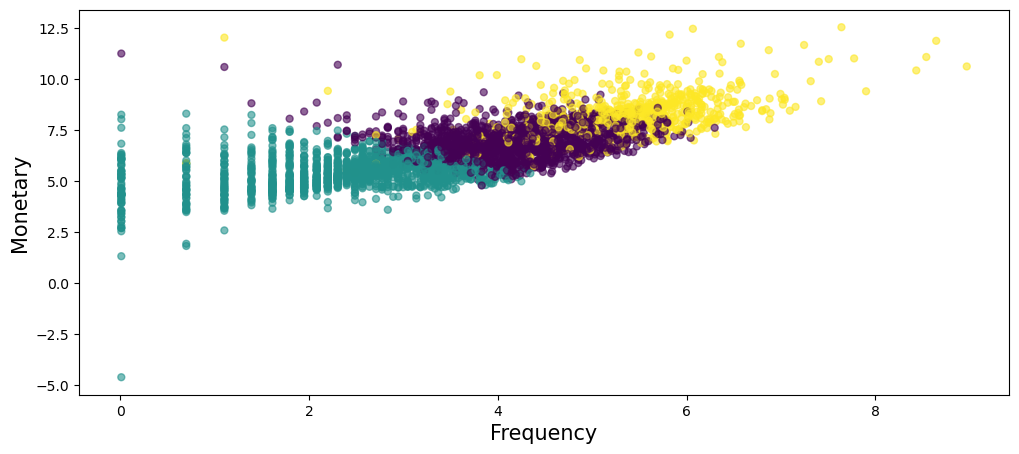

In [84]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
rfm['cen_x'] = rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
rfm['cen_y'] = rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
rfm['c'] = rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(12,5))
plt.scatter(rfm.Frequency, rfm.Amount, c=rfm.cluster, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)